In [1]:
# LOAD DATASET
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from modules.ML_tools import MissingValuesImputer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# fetch dataset 
secondary_mushroom = fetch_ucirepo(id=848) 
  
# data (as pandas dataframes) 
X = secondary_mushroom.data.features 
y = secondary_mushroom.data.targets 
y.loc[:, 'class'] = y['class'].map({'e': True, 'p': False})

#X = X.drop(columns=['does-bruise-or-bleed'])

random_state = 24

# Split train e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=random_state)

print("Dataset size      |", X.shape[0])
print("Training set size |", X_train.shape[0])
print("Test set size     |", X_test.shape[0])


print(f"Dataset edible ratio: {y['class'].sum() / y.shape[0]}")
print(f"Training set edible ratio: {y_train['class'].sum() / y_train.shape[0]}")
print(f"Test set edible ratio: {y_test['class'].sum() / y_test.shape[0]}")

# Preprocessing
imputer = MissingValuesImputer()
X_train_i = imputer.fit_transform(X_train)
X_test_i = imputer.transform(X_test)

Dataset size      | 61069
Training set size | 42748
Test set size     | 18321
Dataset edible ratio: 0.44508670520231214
Training set edible ratio: 0.4471086366613643
Test set edible ratio: 0.4403689754926041


Index(['has-ring', 'veil-type', 'does-bruise-or-bleed'], dtype='object')


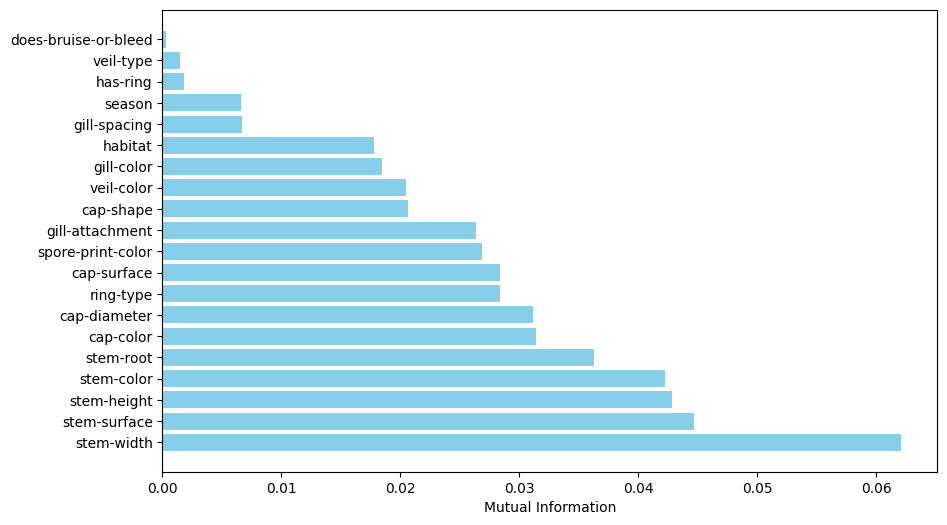

stem-width              0.062064
stem-surface            0.044656
stem-height             0.042842
stem-color              0.042292
stem-root               0.036275
cap-color               0.031370
cap-diameter            0.031158
ring-type               0.028401
cap-surface             0.028349
spore-print-color       0.026842
gill-attachment         0.026404
cap-shape               0.020657
veil-color              0.020467
gill-color              0.018422
habitat                 0.017780
gill-spacing            0.006647
season                  0.006634
has-ring                0.001785
veil-type               0.001434
does-bruise-or-bleed    0.000330
dtype: float64


In [2]:
# FEATURE INFORMATION
from modules.ML_tools import compute_mutual_information

mi = compute_mutual_information(X_train, y_train, random_state=random_state)

print(mi[-3:].index)
plt.figure(figsize=(10, 6))  
plt.barh(mi.index, mi, color='skyblue') 
plt.xlabel('Mutual Information')

plt.show()
print(mi)

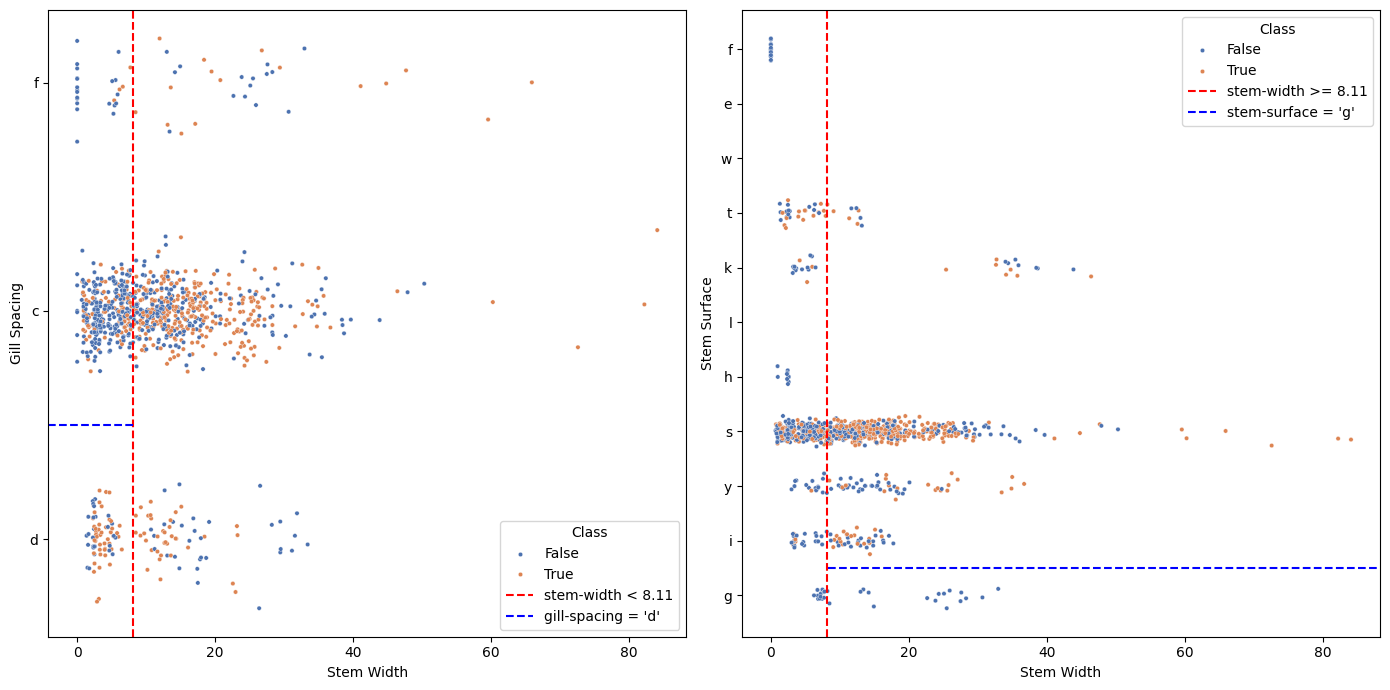

In [14]:
# SCATTER PLOT
df = pd.concat([X_train_i, y_train], axis=1)
df = df.sample(n=min(len(df), 1000), random_state=42)
df['stem-surface'] = pd.Categorical(df['stem-surface'], categories=['g', 'i', 'y', 's', 'h', 'l', 'k', 't', 'w', 'e', 'f'], ordered=True)
df['gill-spacing'] = pd.Categorical(df['gill-spacing'], categories=['d', 'c', 'f'], ordered=True)


#add noise
df['gill-spacing-num'] = df['gill-spacing'].astype('category').cat.codes
df['gill-spacing-noise'] = df['gill-spacing-num'] + np.random.normal(0, 0.1, size=len(df))

df['stem-surface-num'] = df['stem-surface'].astype('category').cat.codes
df['stem-surface-noise'] = df['stem-surface-num'] + np.random.normal(0, 0.1, size=len(df))


plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)  
sns.scatterplot(data=df, x='stem-width', y='gill-spacing-noise', hue='class', palette='deep', s=10)
plt.axvline(x=8.11, color='red', linestyle='--', label='stem-width < 8.11')
plt.axhline(y=0.5, color='blue', linestyle='--', xmin=0, xmax=0.135, label="gill-spacing = 'd'")
plt.xlabel('Stem Width')
plt.ylabel('Gill Spacing')
plt.legend(title='Class')

categories = df['gill-spacing'].astype('category').cat.categories
y_ticks = range(len(categories))
plt.yticks(ticks=y_ticks, labels=categories)

#---------------------

plt.subplot(1, 2, 2) 
sns.scatterplot(data=df, x='stem-width', y='stem-surface-noise', hue='class', palette='deep', s=10)
plt.axvline(x=8.11, color='red', linestyle='--', label='stem-width >= 8.11')
plt.axhline(y=0.5, color='blue', linestyle='--', xmin=0.135, xmax=1, label="stem-surface = 'g'")
plt.xlabel('Stem Width')
plt.ylabel('Stem Surface')
plt.legend(title='Class')

categories = df['stem-surface'].astype('category').cat.categories
y_ticks = range(len(categories))
plt.yticks(ticks=y_ticks, labels=categories)

plt.tight_layout()
plt.show()

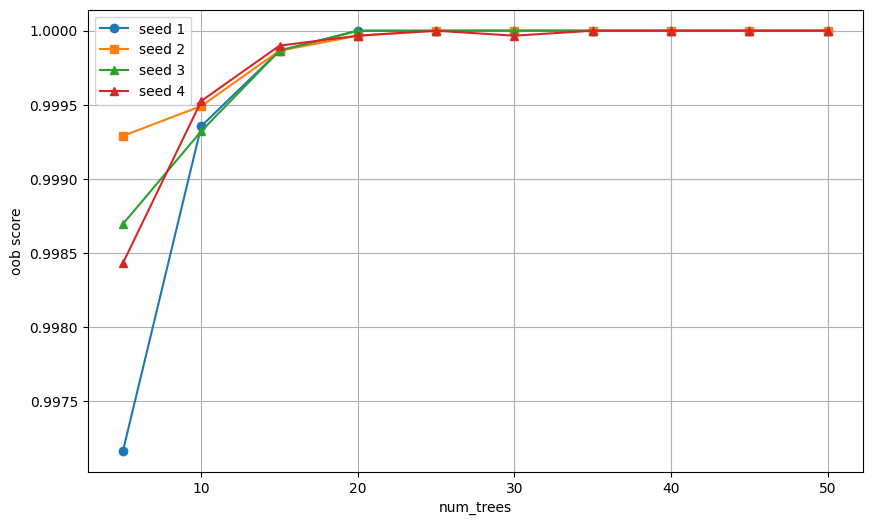

In [15]:
# RANDOM FOREST TREES

RF_seed1 = [0.9971673499813641, 0.9993566736642514, 0.999865776316231, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
RF_seed2 = [0.9992909389461113, 0.9994920591920355, 0.999865731261119, 0.9999664699570815,1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
RF_seed3 = [0.9986971896519635, 0.9993228602383532, 0.9998657537924553, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
RF_seed4 = [0.9984333034914951, 0.9995262587980509, 0.9998993254807208, 0.99996647108130 , 1.0, 0.9999664733295336, 1.0, 1.0, 1.0, 1.0]

x_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

plt.figure(figsize=(10, 6))

plt.plot(x_values, RF_seed1, label='seed 1', marker='o')
plt.plot(x_values, RF_seed2, label='seed 2', marker='s')
plt.plot(x_values, RF_seed3, label='seed 3', marker='^')
plt.plot(x_values, RF_seed4, label='seed 4', marker='^')

plt.xlabel('num_trees')
plt.ylabel('oob score')

plt.grid(True)
plt.legend()
plt.show()